# Class 7 mapping and coordinates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs

In [2]:
filename='air.2m.gauss.2020.nc'
data=nc.Dataset(filename)
print(data.variables.keys())

dict_keys(['lat', 'lon', 'time', 'air', 'time_bnds'])


In [3]:
# get coordinates
lon=data['lon'][:]
lat=data['lat'][:]
# get 2m air temperature data
air=data['air'][:]

### Let's plot it contourf

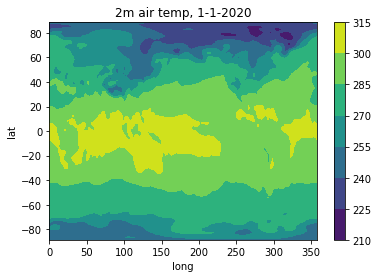

In [4]:
plt.contourf(lon,lat,air[0,:,:])
plt.xlabel('long')
plt.ylabel('lat')
plt.colorbar()
plt.title('2m air temp, 1-1-2020')
plt.show()

### Plot over the North Pole using Azimuthal projection (Stereographic)

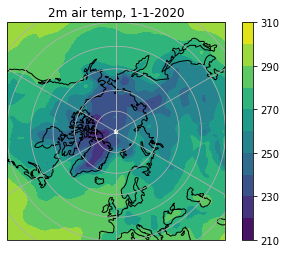

In [5]:
# wrap around the globe
lon2=np.insert(lon,192,360)
air2=np.insert(air,192,air[:,:,0],axis=2)

# plot North Polar Stereographic
plt.figure()
ax1 = plt.subplot(111, projection=ccrs.NorthPolarStereo())
ax1.set_extent([-180, 180, 40, 90], ccrs.PlateCarree()) # all longitudes, from 40N to 90N

# plot contourf as defined in lon x lat coordinate
ct=np.arange(210,315,10)
c=ax1.contourf(lon2,lat,air2[0,:,:],ct,transform=ccrs.PlateCarree())

# show grid line
ax1.gridlines()
plt.title('2m air temp, 1-1-2020')
plt.colorbar(c)
ax1.coastlines('110m', alpha=1)
plt.show()

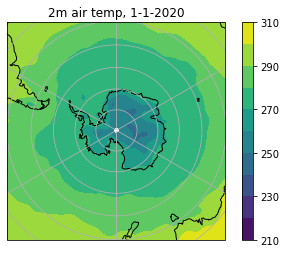

In [6]:
# plot South Polar Stereographic
plt.figure()
ax1 = plt.subplot(111, projection=ccrs.SouthPolarStereo())
ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree()) # all longitudes, from 40S to 90S

# plot contourf as defined in lon x lat coordinate
ct=np.arange(210,315,10)
c=ax1.contourf(lon2,lat,air2[0,:,:],ct,transform=ccrs.PlateCarree())

# show grid line
ax1.gridlines()
plt.title('2m air temp, 1-1-2020')
plt.colorbar(c)
ax1.coastlines('110m', alpha=1)
plt.show()

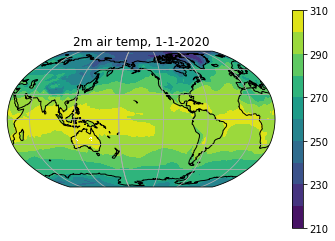

In [7]:
# plot Robinson
plt.figure()
ax1 = plt.subplot(111, projection=ccrs.Robinson(central_longitude=-150))
ax1.set_global()

# plot contourf as defined in lon x lat coordinate
ct=np.arange(210,315,10)
c=ax1.contourf(lon2,lat,air2[0,:,:],ct,transform=ccrs.PlateCarree())

# show grid line
ax1.gridlines()
plt.title('2m air temp, 1-1-2020')
plt.colorbar(c)
ax1.coastlines('110m', alpha=1)
plt.show()

# ETOPO2v2
### 2 minute global topographic map

In [8]:
filename='ETOPO2v2c_f4.nc'
data=nc.Dataset(filename)
print(data.variables.keys())

dict_keys(['x', 'y', 'z'])


In [9]:
# read in variables
x=data['x'][:]
y=data['y'][:]
z=data['z'][:]

### US west coast topography

In [10]:
xr=(x>-160)&(x<-100)
yr=(y>20)&(y<60)

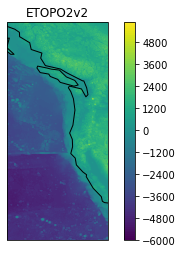

In [11]:
# plot PlateCarree
plt.figure()
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.set_extent([-132, -120, 30, 56], ccrs.PlateCarree()) 


# plot contourf as defined in lon x lat coordinate
ct=np.arange(-6000,6000,100)
zz=z[:,xr]
c=ax1.contourf(x[xr],y[yr],zz[yr,:],ct,transform=ccrs.PlateCarree())

# show grid line
plt.title('ETOPO2v2')
plt.colorbar(c)
ax1.coastlines('110m', alpha=1)
plt.show()